In [ ]:
import pandas as pd
import re
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import nltk
import spacy
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data=pd.read_csv("/content/people_wiki.csv")

In [ ]:
data

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...,...
6417,<http://dbpedia.org/resource/Chad_Knight>,Chad Knight,chad knight born october 24 1970 sacramento ca...
6418,<http://dbpedia.org/resource/Bruce_Bawer>,Bruce Bawer,theodore bruce bawer born october 31 1956 in n...
6419,<http://dbpedia.org/resource/Mark_Lockheart>,Mark Lockheart,mark lockheart born lymington 1961 is a britis...
6420,<http://dbpedia.org/resource/Damien_M._Corsetti>,Damien M. Corsetti,damien m corsetti was a soldier in the united ...


In [ ]:
data["text"]

,text
0,digby morrell born 10 october 1979 is a former...
1,alfred j lewy aka sandy lewy graduated from un...
2,harpdog brown is a singer and harmonica player...
3,franz rottensteiner born in waidmannsfeld lowe...
4,henry krvits born 30 december 1974 in tallinn ...
...,...
6417,chad knight born october 24 1970 sacramento ca...
6418,theodore bruce bawer born october 31 1956 in n...
6419,mark lockheart born lymington 1961 is a britis...
6420,damien m corsetti was a soldier in the united ...


In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
data['processed_text'] = data["text"].apply(preprocess_text)

In [ ]:
data

,URI,name,text,processed_text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,digby morrell born october is a former austral...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,henry krvits born december in tallinn better k...
...,...,...,...,...
6417,<http://dbpedia.org/resource/Chad_Knight>,Chad Knight,chad knight born october 24 1970 sacramento ca...,chad knight born october sacramento california...
6418,<http://dbpedia.org/resource/Bruce_Bawer>,Bruce Bawer,theodore bruce bawer born october 31 1956 in n...,theodore bruce bawer born october in new york ...
6419,<http://dbpedia.org/resource/Mark_Lockheart>,Mark Lockheart,mark lockheart born lymington 1961 is a britis...,mark lockheart born lymington is a british jaz...
6420,<http://dbpedia.org/resource/Damien_M._Corsetti>,Damien M. Corsetti,damien m corsetti was a soldier in the united ...,damien m corsetti was a soldier in the united ...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Apply tokenization using lambda
data['token'] = data['processed_text'].apply(lambda text: word_tokenize(text))

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Directly remove stopwords from the tokenized list
data['token_without_stopwords'] = data['token'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)


In [ ]:
nltk.download('wordnet', quiet=True)

# Initialize stemmers and lemmatizers
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()


In [ ]:
data['stemmed_tokens'] = data['token_without_stopwords'].apply(
    lambda tokens: [porter_stemmer.stem(token) for token in tokens]
)

# Apply lemmatization to tokens without stopwords
data['lemmatized_tokens'] = data['token_without_stopwords'].apply(
    lambda tokens: [wordnet_lemmatizer.lemmatize(token) for token in tokens]
)

In [ ]:
data['clean_text'] = data['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
data['clean_text']

,clean_text
0,digby morrell born october former australian r...
1,alfred j lewy aka sandy lewy graduated univers...
2,harpdog brown singer harmonica player active c...
3,franz rottensteiner born waidmannsfeld lower a...
4,henry krvits born december tallinn better know...
...,...
6417,chad knight born october sacramento california...
6418,theodore bruce bawer born october new york cit...
6419,mark lockheart born lymington british jazz ten...
6420,damien corsetti soldier united state army part...


In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
vectorizer = TfidfVectorizer(
            max_features=200,
            stop_words='english',
            ngram_range=(5,5)

        )

        # Compute TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(data['clean_text'] )

In [ ]:
# If tfidf_reduced is already a NumPy array, you can directly use it
X = tfidf_matrix  # No need for .vstack() or .values

# Apply K-Means clustering
kmeans = KMeans(n_clusters=11, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X)

# Store cluster labels
data["kmeans_cluster"] = clusters_kmeans

# Evaluate using Silhouette Score
silhouette_kmeans = silhouette_score(X, clusters_kmeans)
print(f"K-Means Silhouette Score: {silhouette_kmeans:.4f}")

K-Means Silhouette Score: 0.8656


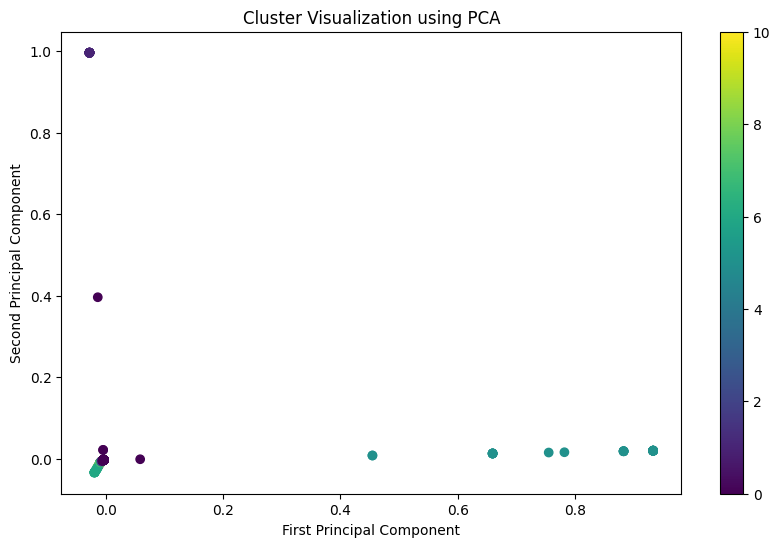

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='viridis')
plt.colorbar(scatter)
plt.title('Cluster Visualization using PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

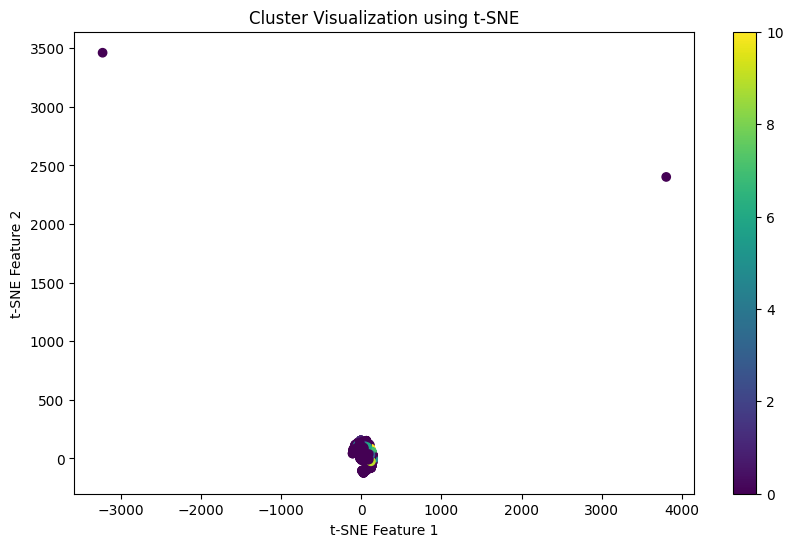

In [ ]:
# Convert sparse matrix to dense array
X_dense = tfidf_matrix.toarray()

# Now use t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_dense)

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_kmeans, cmap='viridis')
plt.colorbar(scatter)
plt.title('Cluster Visualization using t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# data['final'] = data['token_without_stopwords'].apply(lambda tokens: tokens[2:] if len(tokens) > 2 else [])


In [ ]:
# data['text_2'] = data['final'].apply(lambda tokens: ' '.join(tokens))


In [ ]:
# vectorizer = TfidfVectorizer()
# tfidf_matrix = vectorizer.fit_transform(data['text_2'])

In [ ]:
# tfidf_matrix

In [ ]:
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# print(tfidf_df)

In [ ]:
data['clean_text'] = data['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))


In [ ]:
data['clean_text']

,clean_text
0,digby morrell born october former australian r...
1,alfred j lewy aka sandy lewy graduated univers...
2,harpdog brown singer harmonica player active c...
3,franz rottensteiner born waidmannsfeld lower a...
4,henry krvits born december tallinn better know...
...,...
12340,charles plympton smith born june burlington ve...
12341,ha derhovagimian sometimes spelled terhovakimy...
12342,eddie copeland prominent irish republican belf...
12343,john j cove canadian anthropologist known work...


In [ ]:
data['clean_text'] = data['clean_text'].apply(lambda text: ' '.join(text.split()[2:]))


In [ ]:
data['clean_text']

,clean_text
0,born october former australian rule footballer...
1,lewy aka sandy lewy graduated university chica...
2,singer harmonica player active canada blue sce...
3,born waidmannsfeld lower austria austria janua...
4,born december tallinn better known stagename g...
...,...
12340,smith born june burlington vermont banker repu...
12341,sometimes spelled terhovakimyan traditional ar...
12342,prominent irish republican belfast northern ir...
12343,cove canadian anthropologist known work gitksa...


In [ ]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence transformer model
sbert_model = SentenceTransformer("bert-base-nli-mean-tokens")

# Convert the entire column into sentence embeddings efficiently
data['bert_vector'] = list(sbert_model.encode(data['clean_text'].tolist()))

print(data.head())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.77k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
X = np.vstack(data['bert_vector'].values)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X)

# Store cluster labels
data["kmeans_cluster"] = clusters_kmeans

# Evaluate using Silhouette Score
silhouette_kmeans = silhouette_score(X, clusters_kmeans)
print(f"K-Means Silhouette Score: {silhouette_kmeans:.4f}")

In [ ]:
# Convert sparse matrix to dense array
X = np.vstack(data['bert_vector'].values)

# Now use t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_dense)

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_kmeans, cmap='viridis')
plt.colorbar(scatter)
plt.title('Cluster Visualization using t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

In [ ]:
# glove_path = "/content/glove.6B.100d.txt"  # Ensure this file exists!
# embeddings_index = {}

# with open(glove_path, "r", encoding="utf-8") as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         vector = np.array(values[1:], dtype="float32")
#         embeddings_index[word] = vector

# print(f"Loaded {len(embeddings_index)} word vectors.")

# # Function to get document vectors (average of word embeddings)
# def get_sentence_vector(sentence, embedding_dim=100):
#     words = sentence.split()
#     vectors = [embeddings_index[word] for word in words if word in embeddings_index]
#     return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)

# # Apply vectorization
# data['glove_vector'] = data['clean_text'].apply(lambda x: get_sentence_vector(x))

# # Convert list of arrays into a NumPy matrix
# X = np.vstack(data['glove_vector'].values)
# print("Shape of GloVe vector matrix:", X.shape)

Loaded 101253 word vectors.
Shape of GloVe vector matrix: (43843, 100)


In [ ]:
# pca = PCA(n_components=50)  # Reduce to 50 dimensions
# X_pca = pca.fit_transform(X)

# print(f"Reduced dimensions: {X_pca.shape}")


In [ ]:
# Apply K-Means with 11 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(data['glove_vector'])

# Store cluster labels
data["kmeans_cluster"] = clusters_kmeans

# Evaluate using Silhouette Score
silhouette_kmeans = silhouette_score(X_pca, clusters_kmeans)
print(f"K-Means Silhouette Score: {silhouette_kmeans:.4f}")


ValueError: Length of values (39046) does not match length of index (43843)

In [ ]:
# Memory-efficient hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_hierarchical = hierarchical.fit_predict(X_pca)

# Store cluster labels
data["hierarchical_cluster"] = clusters_hierarchical

# Evaluate using Silhouette Score
silhouette_hierarchical = silhouette_score(X_pca, clusters_hierarchical)
print(f"Hierarchical Clustering Silhouette Score: {silhouette_hierarchical:.4f}")

In [ ]:
def visualize_clusters(data, labels, method="tsne"):
    if method == "tsne":
        reduced_data = TSNE(n_components=2, random_state=42).fit_transform(data)
    elif method == "pca":
        reduced_data = PCA(n_components=2).fit_transform(data)
    else:
        raise ValueError("Invalid visualization method! Use 'tsne' or 'pca'.")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette="bright")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(f"Cluster Visualization using {method.upper()}")
    plt.legend()
    plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['clean_text'])

In [ ]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7859531 stored elements and shape (59071, 496042)>

In [ ]:
print(tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7859531 stored elements and shape (59071, 496042)>
  Coords	Values
  (0, 53649)	0.01494834516777703
  (0, 311221)	0.03429575984073962
  (0, 158198)	0.027720465720559934
  (0, 30365)	0.13680932683803942
  (0, 377748)	0.056749082440499074
  (0, 157258)	0.04984603917188832
  (0, 338080)	0.08977688121121334
  (0, 226064)	0.27838716941244535
  (0, 68630)	0.1498758807588952
  (0, 157219)	0.41844270634553427
  (0, 246608)	0.1451063788604082
  (0, 6452)	0.1327868358883584
  (0, 477445)	0.04805896561189185
  (0, 30224)	0.045465834494720414
  (0, 288346)	0.4794776249507994
  (0, 128279)	0.03441409524321527
  (0, 393060)	0.11638282004157226
  (0, 477343)	0.08474041171106435
  (0, 332109)	0.07112356579415277
  (0, 165353)	0.08013861619246232
  (0, 67901)	0.02709745700822718
  (0, 146320)	0.08068950830120514
  (0, 411928)	0.07674328668236854
  (0, 84773)	0.05227456682984612
  (0, 246541)	0.08302422038976721
  :	:
  (59070, 416795)	0.0758

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []  # Within-Cluster Sum of Squares (WCSS)
K = range(2, 11)  # Try clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

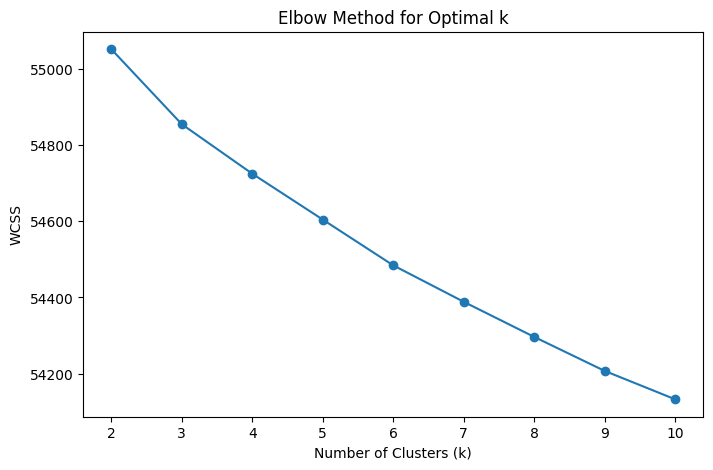

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
wcss = []  # Within-Cluster Sum of Squares (WCSS)
K = range(10, 15)  # Try clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

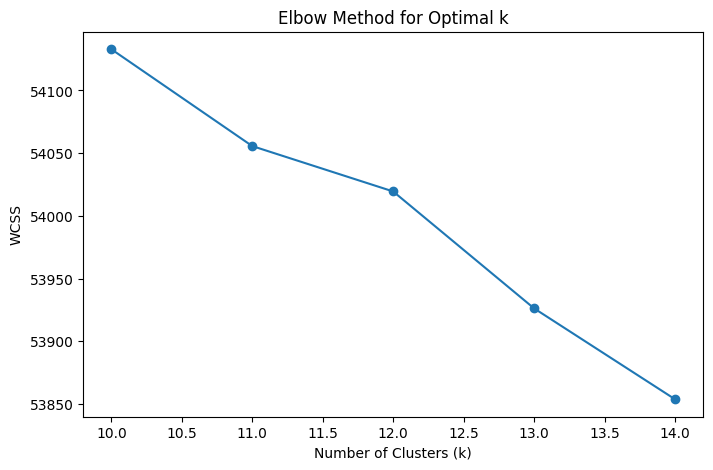

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(tfidf_matrix)

In [ ]:
data["cluster"]

,cluster
0,1
1,2
2,0
3,0
4,0
...,...
59066,0
59067,0
59068,1
59069,1


In [ ]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score for TF-IDF-based K-Means
sil_score = silhouette_score(tfidf_matrix, data['cluster'])
print(f"Silhouette Score (TF-IDF): {sil_score:.4f}")

Silhouette Score (TF-IDF): 0.0057


In [ ]:
kmeans = KMeans(n_clusters=11, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(tfidf_matrix)

In [ ]:
from sklearn.manifold import TSNE

# Reduce TF-IDF matrix to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tfidf_tsne = tsne.fit_transform(tfidf_matrix.toarray())

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tfidf_tsne[:, 0], y=tfidf_tsne[:, 1], hue=data['cluster'], palette='tab10', alpha=0.7)
plt.title("t-SNE Visualization of TF-IDF Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-03-24 18:36:52--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-03-24 18:36:52--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-24 18:36:52--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np

# Load GloVe embeddings
glove_path = "/content/glove.6B.100d.txt"  # Change path if needed
embeddings_index = {}

with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = vector

print(f"Loaded {len(embeddings_index)} word vectors.")


Loaded 400000 word vectors.


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def get_sentence_vector(text):
    words = word_tokenize(text.lower())  # Tokenize & lowercase
    vectors = [embeddings_index[word] for word in words if word in embeddings_index]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)  # Average word embeddings

# Apply to dataset
data['glove_vector'] = data['clean_text'].apply(get_sentence_vector)

# Convert list to NumPy array for clustering
glove_vectors = np.vstack(data['glove_vector'].values)
print("GloVe embeddings shape:", glove_vectors.shape)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


GloVe embeddings shape: (59071, 100)


In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means with 11 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(glove_vectors)

print("Clustering complete!")


In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(glove_vectors, data['cluster'])
print(f"Silhouette Score (GloVe): {sil_score:.4f}")


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Use Ward's method to calculate linkage
Z = linkage(glove_vectors, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=10)  # Show top 10 levels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Documents")
plt.ylabel("Distance")
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Create Agglomerative clustering model
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['hierarchical_cluster'] = agg_clustering.fit_predict(glove_vectors)

print("Hierarchical Clustering Complete!")


In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
glove_tsne = tsne.fit_transform(glove_vectors)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=glove_tsne[:, 0], y=glove_tsne[:, 1], hue=data['hierarchical_cluster'], palette='tab10', alpha=0.7)
plt.title("t-SNE Visualization of Hierarchical Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensionality of GloVe vectors to 50 (or even 20 for extreme cases)
pca = PCA(n_components=50)
glove_reduced = pca.fit_transform(glove_vectors)

print("Reduced GloVe vector shape:", glove_reduced.shape)


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Memory-efficient hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['hierarchical_cluster'] = agg_clustering.fit_predict(glove_reduced)

print("Hierarchical Clustering Complete!")


In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Use fewer components and lower perplexity
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
glove_tsne = tsne.fit_transform(glove_reduced)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=glove_tsne[:, 0], y=glove_tsne[:, 1], hue=data['hierarchical_cluster'], palette='tab10', alpha=0.7)
plt.title("Optimized t-SNE Visualization of Hierarchical Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()
